In [24]:
import numpy as np
import pdb
import matplotlib.pyplot as plt

### Q2: Gaussian Mixture Models and EM Algorithm

Data matrix given in the question is initialized below:

In [25]:
# Initializing data matrix


x = np.matrix([[1.5, 4.5],
 [2.2, 1.5],
 [3.9, 3.4],
 [2.1, 2.9],
 [0.5, 3.2],
 [0.9, 4.3],
 [2.7, 2.1],
 [2.5, 3.5],
 [2.8, 4.9],
 [0.1, 3.7]])

# Initial Mean required
mu = np.matrix([[0.5,4.2], [2.4,1.6],[3,3.2]])

# Initial Covariance matrix
cov = np.array([[[1,0],[0,1]], [[1,0],[0,1]],[[1,0],[0,1]]], dtype='float')

# Initial Prior
pc = np.array([1/3,1/3,1/3])

# Number of attributes
d = 2

# Number of clusters
nc = 3

# Number of data points
n = x.shape[0]

### a) Compute the first EM iterates of the cluster means.

Prior to finding the updated means of the cluster, we need to compute the posterior probabilities. </br>

Let $f_i(x) = f(x | \mu , \Sigma) = \frac{1}{(2 \pi)^\frac{d}{2} (|\Sigma|)^\frac{1}{2}} exp(-\frac{(x - \mu_i)^T\Sigma(x-\mu_i)}{2})$

where $\mu_i$(mean of each cluster) and $\Sigma_i$(covariance) are both unknown parameters </br>

The probability density function of X is given as a Gaussian Mixture Model over all $k$ clusters <\br>

$f(x) = \Sigma_{i=1}^kf_i(x)P(C_i) = \Sigma_{i=1}^kf(x | \mu , \Sigma)P(C_i)$  where $P(C_i)$ are the Prior probabilities. 

$f(x)$ is calculated in the given code below:

In [26]:
# Calculation of f(x_i) for a bivariate normal distribution
def bv_norml(x, mu, cov):
    
    # Exponential Term
    exp_ = np.matrix(x-mu)*np.linalg.inv(cov)*np.matrix(x-mu).T
    # Coefficient term
    coeff = 1/(np.power(2*np.pi,d/2) *np.sqrt(np.linalg.det(cov)) )
    
    #Calculate f(x_i)
    fx_i = coeff * np.exp(- exp_ / 2)
    
    return fx_i.item()

#### Expectation calculation


Calucate Posterior Probabilities :

$w_{ij} = P(C_i, x_j) = \frac{f_i(x_i) . P(C_i)}{\Sigma_{a=1}^k f_a(x_a) . P(C_a)}$

Calculation of the above is given in the below code: 

In [27]:
mu_0 = mu

# Expectation Step
w = np.zeros((nc,n))

# Calculate Posterior Probabilities
for i in range(nc):

    for j in range(n):

        num = bv_norml(x[j], mu[i], cov[i])  * pc[i] 
        den = 0

        for k in range(nc):
            den += bv_norml(x[j], mu[k], cov[k]) * pc[k]

        w[i][j] = num / den

#### Maximization Step

Calculating updated cluster means :

$\mu_i = \frac{\Sigma_{j=1}^nw_{ij}.x_j}{\Sigma_{j=1}^nw_{ij}} $

Calculation of mean is given in the below code:



In [28]:
mu = w * x / np.matrix(w.sum(axis = 1)).T

for i in range(3):
    print("Mean for cluster  ",i+1, "  , ", mu[i]) 

Mean for cluster   1   ,  [[0.90405015 3.91712731]]
Mean for cluster   2   ,  [[2.34984409 2.22635325]]
Mean for cluster   3   ,  [[2.72488742 3.52342783]]


### b) Show the data on a scatter plot, together with the initial and iterated means. Comment on your answer.

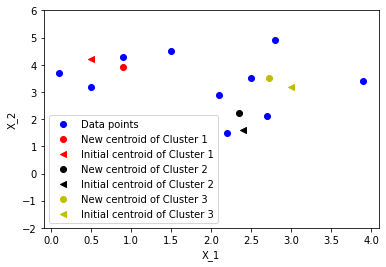

In [29]:
plt.scatter(np.array(x[:,0]).flatten(),np.array(x[:,1]).flatten(),c = 'b', label = 'Data points')

# Plot the centroid of three clusters
plt.scatter(mu[0,0], mu[0,1],c = 'r', label = 'New centroid of Cluster 1')
plt.scatter(mu_0[0,0], mu_0[0,1],c = 'r', marker = '<', label = 'Initial centroid of Cluster 1')
plt.scatter(mu[1,0], mu[1,1],c = 'k', label = 'New centroid of Cluster 2')
plt.scatter(mu_0[1,0], mu_0[1,1],c = 'k', marker = '<', label = 'Initial centroid of Cluster 2')
plt.scatter(mu[2,0], mu[2,1],c = 'y', label = 'New centroid of Cluster 3')

plt.scatter(mu_0[2,0], mu_0[2,1],c = 'y', marker = '<',label = 'Initial centroid of Cluster 3')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.ylim([-2,6])

plt.rcParams.update({'font.size': 10})
plt.legend()
plt.show()

From the scatter plot above, we can observe that the mean of each cluster has been updated. The Red cluster (C1) has shifted towards the centre of the first 4 data points from the left. In the same manner, Black (C2) and Yellow(C3) has shifted closer to data points such that the probability of these distributions given the data points are higher as compared to the previous iteration which accounts for better clustering i.e more relevant data in the cluster. 

### c) Compute the first EM iterates of the mixture probabilities.

The updated mixture probabilities / Prior probabilities:

$ P(C_i) = \frac{\Sigma_{j=1}^nw_{ij}}{n}  $

The python code to update the prior probabilities is given below :

In [30]:
for i in range(nc):
    
    P_c[i] =  w.sum(axis = 1)[i] / n
    print("Prior probability of Cluster ",i+1," :",P_c[i])

NameError: name 'P_c' is not defined

### d) Compute the first iterates of the covariance matrices for the three clusters.

The updated covariance matrix:

$\Sigma_i = \frac{\Sigma_{j=1}^nw_{ij}(x_j - \mu_i)(x_j - \mu_i)^T}{\Sigma_{j=1}^nw_{ij}}$

The python code to calculate updated covariance matrix is given below :

In [ ]:
for i in range(nc):

    # Updating Covariance matrix
    cov[i] = (x - mu[i]).T * np.diag(w[i]) * (x - mu[i]) / w.sum(axis = 1)[i]
    print("Covariance matrix of Cluster ",i+1," :\n",cov[i])

Covariance matrix of Cluster  1  :
 [[0.55102884 0.20653126]
 [0.20653126 0.31771681]]
Covariance matrix of Cluster  2  :
 [[0.29499013 0.00514977]
 [0.00514977 0.58621392]]
Covariance matrix of Cluster  3  :
 [[0.63676414 0.01587902]
 [0.01587902 0.86305495]]
